## Assignment 2 - Robust regression


Name: Aviv Yefet
 
ID: 208495267


### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from tabulate import tabulate

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

### Load dataset

In [2]:
# Importing the dataset

path = 'C:\\Users\\nbloc\\Desktop\\4Year\\ML\HW2\\'
file = 'bodyfat.csv'
dataset = pd.read_csv(path + file)

dataset.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Dependent and Independent variables

In [3]:
X = dataset.loc[:, dataset.columns != "BodyFat"].values
y = dataset["BodyFat"].values

dataset.head()


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Training and testimg sets

In [4]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Standardization


In [5]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)


### Fitting robust models 

In [6]:
# creat df for each model:
# the df will contain rmse and r^2 values for each value of alpha (and ratio)

ridge_df = pd.DataFrame(columns = ['Alpha','RMSE','R^2'])
lasso_df = pd.DataFrame(columns = ['Alpha','RMSE','R^2'])
elasticNet_df = pd.DataFrame(columns = ['Alpha','Ratio','RMSE','R^2'])

Alpha: 0 , R^2_r: 0.9756101110735196 ,coef_ridge: [-7.63076049e+00  1.60360156e-01  5.41604263e-01  6.52393706e-04
 -2.32124619e-01  2.67340682e-01 -2.62410866e-02  1.57316241e-01
 -1.32470409e-01  3.74843793e-02 -1.83154430e-01 -2.63273292e-01
  6.90944489e-02  1.56260810e-01] 
Alpha: 0 , R^2_l: 0.9756101110735196, coef_lasso [-7.63076049e+00  1.60360156e-01  5.41604263e-01  6.52393706e-04
 -2.32124619e-01  2.67340682e-01 -2.62410866e-02  1.57316241e-01
 -1.32470409e-01  3.74843793e-02 -1.83154430e-01 -2.63273292e-01
  6.90944489e-02  1.56260810e-01]
Alpha: 0,ratio: 0.5 , R^2_e: 0.9756101110735196, ElsaticNet_coef: [-7.63076049e+00  1.60360156e-01  5.41604263e-01  6.52393706e-04
 -2.32124619e-01  2.67340682e-01 -2.62410866e-02  1.57316241e-01
 -1.32470409e-01  3.74843793e-02 -1.83154430e-01 -2.63273292e-01
  6.90944489e-02  1.56260810e-01]




Alpha: 0.1 , R^2_r: 0.9756451795416812 ,coef_ridge: [-7.61656947e+00  1.61016853e-01  5.28595999e-01  1.15133018e-03
 -2.33484130e-01  2.665765

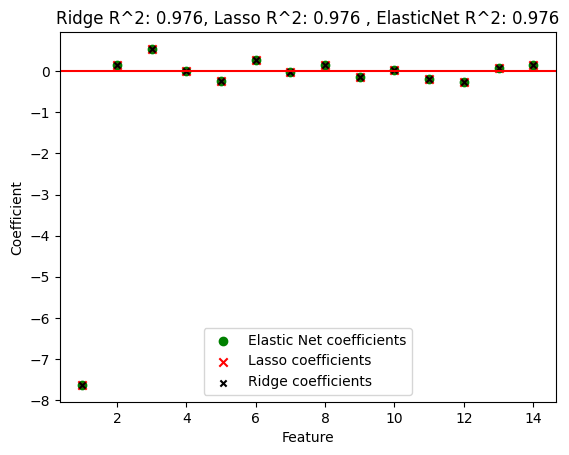

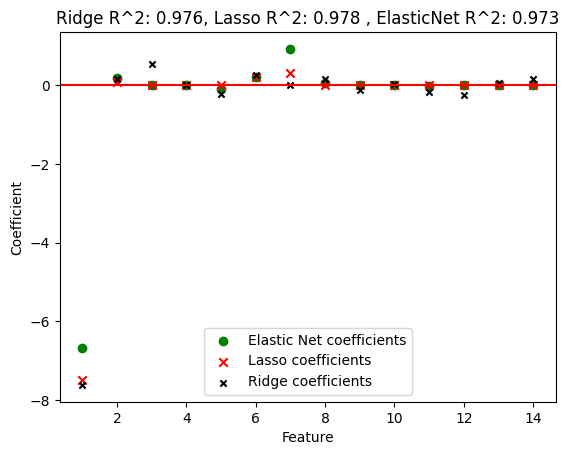

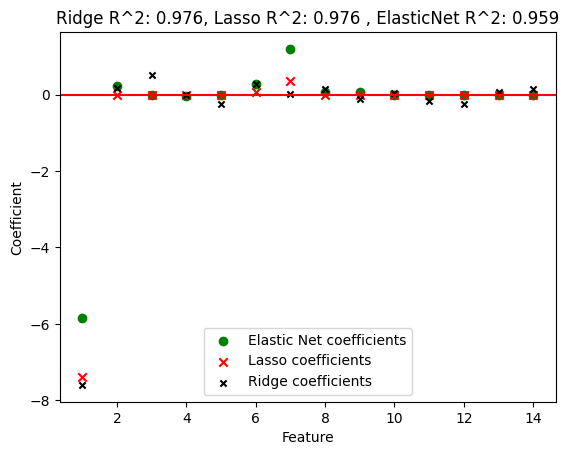

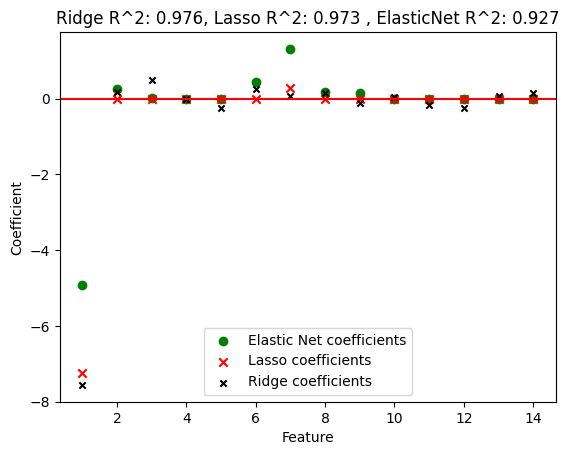

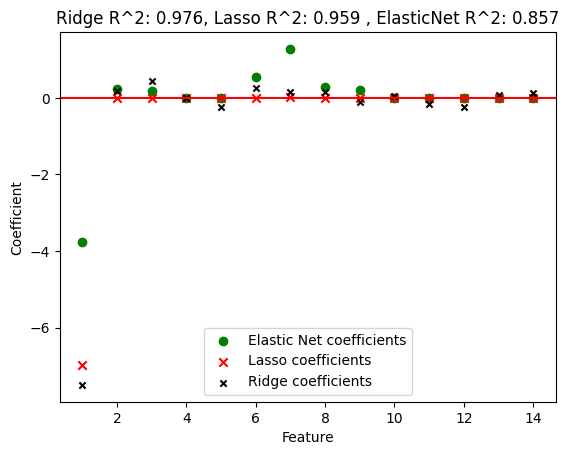

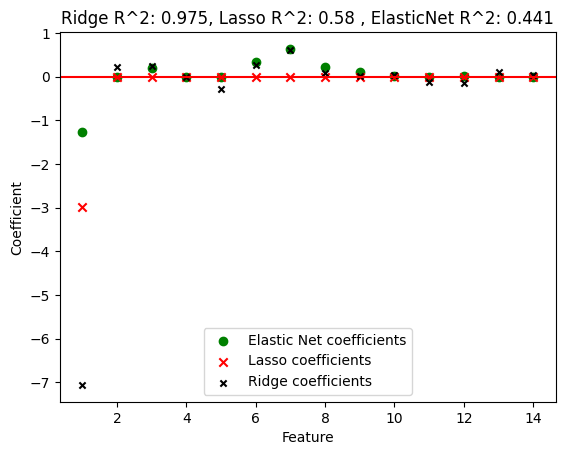

In [11]:
# traning and testing roubst model for each value of alpha (and ratio)

for alpha in [0,0.1,0.25,0.5,1,5]:
    
    plt.figure()
    
                                         # # Ridge Regression  # #
    ridge_reg = Ridge(alpha = alpha)
    ridge_reg.fit(X_train,y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred_ridge))
    r2_ridge = r2_score(y_test,y_pred_ridge)
    ridge_coef = ridge_reg.coef_
    
    print("Alpha: {} , R^2_r: {} ,coef_ridge: {} ".format(alpha,r2_ridge,ridge_coef)) 
    
    # adding the result into ridge_df   
    ridge_df = ridge_df.append({'Alpha': alpha,'RMSE' :rmse_ridge, 'R^2' :  r2_ridge }, ignore_index = True) 
     
 
        
                                        # # Lasso Regression  # #
    lasso_reg =Lasso(alpha = alpha)
    lasso_reg.fit(X_train,y_train)
    y_pred_lasso = lasso_reg.predict(X_test)
    rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    r2_lasso = r2_score(y_test, y_pred_lasso)
    lasso_coef = lasso_reg.coef_

    print("Alpha: {} , R^2_l: {}, coef_lasso {}".format(alpha,r2_lasso, lasso_coef))
    
    # adding the result into lasso_df
    lasso_df = lasso_df.append({'Alpha': alpha,'RMSE' : rmse_lasso, 'R^2' :  r2_lasso } , ignore_index = True)
    
    

                                       # # Elastic-Net Regression # #
    for ratio in [0,0.2,0.4,0.6,0.8,1,0.5]:

        ElasticNet_reg = ElasticNet(alpha = alpha,l1_ratio = ratio)
        ElasticNet_reg.fit(X_train,y_train)
        y_pred_elasticNet = ElasticNet_reg.predict(X_test)
        rmse_elasticNet = np.sqrt(mean_squared_error(y_test,y_pred_elasticNet))
        r2_elasticNet = r2_score(y_test,y_pred_elasticNet)
        elasticNet_coef = ElasticNet_reg.coef_
       
        
        # add the value of rmse and r^2 if ratio in [0,0.2,0.4,0.6,0.8,1] into elasticNet_df
        if ratio != 0.5: 
            elasticNet_df = elasticNet_df.append({'Alpha': alpha,'Ratio': ratio, 'RMSE' : rmse_elasticNet, 'R^2' :  r2_elasticNet}, ignore_index = True)
            

                                              #  # Plots # #
                
        # if ratio = 0.5 plotting the coefficient of every feature, when using: Ridge, Lasso, and ElsticNet for each value of alpha
        else: 
            
            print("Alpha: {},ratio: {} , R^2_e: {}, ElsaticNet_coef: {}".format(alpha,ratio,r2_elasticNet,elasticNet_coef ))
            print("\n\n\n")
            
            # ploting: 
            x = list(range(1,len(elasticNet_coef.tolist())+1)) # feater number
            plt.scatter(x,elasticNet_coef.tolist(), marker = 'o',c = 'green')
            plt.scatter(x,lasso_coef.tolist(), marker = 'x', c = 'red')
            plt.scatter(x,ridge_coef.tolist(), marker = 'x', c = 'black', s = 20)

            plt.axhline(y = 0, color = 'r', linestyle = '-')

            plt.title("Ridge R^2: {}, Lasso R^2: {} , ElasticNet R^2: {}".format( round(r2_ridge,3),round(r2_lasso,3), round(r2_elasticNet,3)))
            plt.legend(['Elastic Net coefficients','Lasso coefficients', 'Ridge coefficients' ], loc ="lower center")

            plt.xlabel('Feature')
            plt.ylabel('Coefficient')



## Df results

In [8]:
ridge_df

,Alpha,RMSE,R^2
0,0.00,1.448615,0.975610
1,0.10,1.447573,0.975645
2,0.25,1.446156,0.975693
3,0.50,1.444155,0.975760
4,1.00,1.441360,0.975854
5,5.00,1.456182,0.975355


In [9]:
lasso_df

,Alpha,RMSE,R^2
0,0.00,1.448615,0.975610
1,0.10,1.380510,0.977850
2,0.25,1.425697,0.976376
3,0.50,1.536171,0.972573
4,1.00,1.879985,0.958922
5,5.00,6.012203,0.579882


In [10]:
elasticNet_df

,Alpha,Ratio,RMSE,R^2
0,0.00,0.0,1.448615,0.975610
1,0.00,0.2,1.448615,0.975610
2,0.00,0.4,1.448615,0.975610
3,0.00,0.6,1.448615,0.975610
4,0.00,0.8,1.448615,0.975610
5,0.00,1.0,1.448615,0.975610
6,0.10,0.0,1.718195,0.965688
7,0.10,0.2,1.637262,0.968844
8,0.10,0.4,1.558149,0.971782
9,0.10,0.6,1.476897,0.974648
